#Data load & proprecessing

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np


In [2]:
import re
import string
import numpy as np
import random
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from plotly import graph_objs as go
import plotly.express as px
import plotly.figure_factory as ff
from collections import Counter

from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator


import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

from tqdm import tqdm
import os
import nltk
import spacy
import random
from spacy.util import compounding
from spacy.util import minibatch

from collections import defaultdict
from collections import Counter

import keras
from keras.models import Sequential
from keras.initializers import Constant
from keras.layers import (LSTM,
                          Embedding,
                          BatchNormalization,
                          Dense,
                          TimeDistributed,
                          Dropout,
                          Bidirectional,
                          Flatten,
                          GlobalMaxPool1D)
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
#from keras.layers.embeddings import Embedding
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from keras.optimizers import Adam

from sklearn.metrics import (
    precision_score,
    recall_score,
    f1_score,
    classification_report,
    accuracy_score
)

In [9]:
import tensorflow as tf

In [6]:
path = "data/"
df = pd.read_csv(path+ "Restaurant reviews.csv")

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Restaurant  10000 non-null  object 
 1   Reviewer    9962 non-null   object 
 2   Review      9955 non-null   object 
 3   Rating      9962 non-null   object 
 4   Metadata    9962 non-null   object 
 5   Time        9962 non-null   object 
 6   Pictures    10000 non-null  int64  
 7   7514        1 non-null      float64
dtypes: float64(1), int64(1), object(6)
memory usage: 625.1+ KB


In [8]:
df['Rating'] = pd.to_numeric(df['Rating'], errors='coerce')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Restaurant  10000 non-null  object 
 1   Reviewer    9962 non-null   object 
 2   Review      9955 non-null   object 
 3   Rating      9961 non-null   float64
 4   Metadata    9962 non-null   object 
 5   Time        9962 non-null   object 
 6   Pictures    10000 non-null  int64  
 7   7514        1 non-null      float64
dtypes: float64(2), int64(1), object(5)
memory usage: 625.1+ KB


In [9]:
df.isna().sum(axis=0)

Restaurant       0
Reviewer        38
Review          45
Rating          39
Metadata        38
Time            38
Pictures         0
7514          9999
dtype: int64

In [10]:
df = df.drop(columns = "7514")

In [11]:
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9954 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Restaurant  9954 non-null   object 
 1   Reviewer    9954 non-null   object 
 2   Review      9954 non-null   object 
 3   Rating      9954 non-null   float64
 4   Metadata    9954 non-null   object 
 5   Time        9954 non-null   object 
 6   Pictures    9954 non-null   int64  
dtypes: float64(1), int64(1), object(5)
memory usage: 622.1+ KB


In [12]:
df.loc[df["Rating"]>3,].shape

(6315, 7)

In [13]:
df.loc[df["Rating"]<=3,].shape

(3639, 7)

In [14]:
df.loc[df["Rating"] <= 2.5, "Rating"] = 0
df.loc[df["Rating"] > 2.5, "Rating"] = 1
df

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",1.0,"1 Review , 2 Followers",5/25/2019 15:54,0
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,1.0,"3 Reviews , 2 Followers",5/25/2019 14:20,0
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,1.0,"2 Reviews , 3 Followers",5/24/2019 22:54,0
3,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,1.0,"1 Review , 1 Follower",5/24/2019 22:11,0
4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,1.0,"3 Reviews , 2 Followers",5/24/2019 21:37,0
...,...,...,...,...,...,...,...
9995,Chinese Pavilion,Abhishek Mahajan,Madhumathi Mahajan Well to start with nice cou...,1.0,"53 Reviews , 54 Followers",6/5/2016 0:08,0
9996,Chinese Pavilion,Sharad Agrawal,This place has never disappointed us.. The foo...,1.0,"2 Reviews , 53 Followers",6/4/2016 22:01,0
9997,Chinese Pavilion,Ramandeep,"Bad rating is mainly because of ""Chicken Bone ...",0.0,"65 Reviews , 423 Followers",6/3/2016 10:37,3
9998,Chinese Pavilion,Nayana Shanbhag,I personally love and prefer Chinese Food. Had...,1.0,"13 Reviews , 144 Followers",5/31/2016 17:22,0


In [15]:
df["Rating"].value_counts()

Rating
1.0    7507
0.0    2447
Name: count, dtype: int64

In [ ]:
df=pd.

#NLP

## Text cleaning

Remove special characters

In [10]:
def clean_text(text):
    '''Make text lowercase, remove text in square brackets,remove links,remove punctuation
    and remove words containing numbers.'''
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

In [17]:
df['Review_clean'] = df['Review'].apply(clean_text)
df.head()

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures,Review_clean
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",1.0,"1 Review , 2 Followers",5/25/2019 15:54,0,the ambience was good food was quite good had...
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,1.0,"3 Reviews , 2 Followers",5/25/2019 14:20,0,ambience is too good for a pleasant evening se...
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,1.0,"2 Reviews , 3 Followers",5/24/2019 22:54,0,a must try great food great ambience thnx for ...
3,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,1.0,"1 Review , 1 Follower",5/24/2019 22:11,0,soumen das and arun was a great guy only becau...
4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,1.0,"3 Reviews , 2 Followers",5/24/2019 21:37,0,food is goodwe ordered kodi drumsticks and bas...


removing the stopwords

In [11]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [19]:
stop_words = stopwords.words('english')
more_stopwords = ['u', 'im', 'c']
stop_words = stop_words + more_stopwords

def remove_stopwords(text):
    text = ' '.join(word for word in text.split(' ') if word not in stop_words)
    return text

df['Review_clean'] = df['Review_clean'].apply(remove_stopwords)
df.head()

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures,Review_clean
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",1.0,"1 Review , 2 Followers",5/25/2019 15:54,0,ambience good food quite good saturday lunch ...
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,1.0,"3 Reviews , 2 Followers",5/25/2019 14:20,0,ambience good pleasant evening service prompt ...
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,1.0,"2 Reviews , 3 Followers",5/24/2019 22:54,0,must try great food great ambience thnx servic...
3,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,1.0,"1 Review , 1 Follower",5/24/2019 22:11,0,soumen das arun great guy behavior sincerety g...
4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,1.0,"3 Reviews , 2 Followers",5/24/2019 21:37,0,food goodwe ordered kodi drumsticks basket mut...


##Remove word with no meaning (less than 3 characters) or nonsense words

In [ ]:
# remove words with length less than 3
df['Review_clean'] = df['Review_clean'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>2]))
df.head()

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures,Review_clean
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",1.0,"1 Review , 2 Followers",5/25/2019 15:54,0,ambience good food quite good saturday lunch c...
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,1.0,"3 Reviews , 2 Followers",5/25/2019 14:20,0,ambience good pleasant evening service prompt ...
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,1.0,"2 Reviews , 3 Followers",5/24/2019 22:54,0,must try great food great ambience thnx servic...
3,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,1.0,"1 Review , 1 Follower",5/24/2019 22:11,0,soumen das arun great guy behavior sincerety g...
4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,1.0,"3 Reviews , 2 Followers",5/24/2019 21:37,0,food goodwe ordered kodi drumsticks basket mut...


##Correct the spelling of the words

In [ ]:
import requests
import zipfile
from spello.model import SpellCorrectionModel

# download the pre-trained zip file from https://haptik-website-images.haptik.ai/spello_models/en_large.pkl.zip
# and unzip it to the current directory

download_url = "https://haptik-website-images.haptik.ai/spello_models/en_large.pkl.zip"
file_name = "data/en_large.pkl.zip"
with open(file_name, "wb") as f:
    f.write(requests.get(download_url).content)

with zipfile.ZipFile(file_name, 'r') as zip_ref:
    zip_ref.extractall()

move the extracted file to the correct directory
os.rename("en_large.pkl", "model/en_large.pkl")

# remove the zip file
os.remove(file_name)

In [ ]:
from spello.model import SpellCorrectionModel

# load the model
spell_model = SpellCorrectionModel(language="en")
spell_model.load("model/en_large.pkl")

C:\Users\kwokt\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\spello\model.py:301: UserWarning: This model was saved on spell<1.3.0. As such due to a bug in previous versions, none of customisations made to the config at the time of training were saved along with the model. It is recommended to load the model, apply all required customizations to config and save it again. E.g.

from spello.model import SpellCorrectionModel 
sp = SpellCorrectionModel(language='en')  
sp.load('/home/ubuntu/model.pkl')
sp.config.min_length_for_spellcorrection = 4 # default is 3
sp.config.max_length_for_spellcorrection = 12 # default is 15
sp.save(model_save_dir='/home/ubuntu/')

After this the model will load without any warnings

  warnings.warn("This model was saved on spell<1.3.0. As such due to a bug in previous versions, "


In [ ]:
# correct the spelling
def correct_spelling(text):
    corrected_text = spell_model.spell_correct(text)
    return corrected_text

df['Review_clean'] = df['Review_clean'].apply(correct_spelling)
df.head()

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures,Review_clean
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",1.0,"1 Review , 2 Followers",5/25/2019 15:54,0,{'original_text': 'ambience good food quite go...
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,1.0,"3 Reviews , 2 Followers",5/25/2019 14:20,0,{'original_text': 'ambience good pleasant even...
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,1.0,"2 Reviews , 3 Followers",5/24/2019 22:54,0,{'original_text': 'must try great food great a...
3,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,1.0,"1 Review , 1 Follower",5/24/2019 22:11,0,{'original_text': 'soumen das arun great guy b...
4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,1.0,"3 Reviews , 2 Followers",5/24/2019 21:37,0,{'original_text': 'food goodwe ordered kodi dr...


In [ ]:
# unpack df['Review_clean'] to seperated columns, e.g. {'original': 'I love this restaurant', 'cleaned': 'love restaurant'}
# to columns 'original' and 'cleaned', respectively
df_1 = pd.DataFrame(df['Review_clean'].apply(pd.Series))
df_1.head()

,original_text,spell_corrected_text,correction_dict
0,ambience good food quite good saturday lunch c...,ambience good food quite good saturday lunch c...,{'soumen': 'suomen'}
1,ambience good pleasant evening service prompt ...,ambience good pleasant evening service prompt ...,"{'soumen': 'someone', 'kudos': 'kitts'}"
2,must try great food great ambience thnx servic...,must try great food great ambience thonx servi...,"{'thnx': 'thonx', 'pradeep': 'pradip', 'subrot..."
3,soumen das arun great guy behavior sincerety g...,simon das arun great guy behavior sincerity go...,"{'soumen': 'simon', 'sincerety': 'sincerity'}"
4,food goodwe ordered kodi drumsticks basket mut...,food god ordered kodai drumsticks basket mutto...,"{'goodwe': 'god', 'kodi': 'kodai', 'biryani': ..."


In [ ]:
# concat df_1 with the original df, drop Review_clean, original_text, correction_dict, and rename spell_corrected_text to Review_clean
df = pd.concat([df, df_1], axis=1)
df = df.drop(columns = ['Review_clean', 'original_text', 'correction_dict'])
df = df.rename(columns = {'spell_corrected_text': 'Review_clean'})
df.head()

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures,Review_clean
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",1.0,"1 Review , 2 Followers",5/25/2019 15:54,0,ambience good food quite good saturday lunch c...
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,1.0,"3 Reviews , 2 Followers",5/25/2019 14:20,0,ambience good pleasant evening service prompt ...
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,1.0,"2 Reviews , 3 Followers",5/24/2019 22:54,0,must try great food great ambience thonx servi...
3,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,1.0,"1 Review , 1 Follower",5/24/2019 22:11,0,simon das arun great guy behavior sincerity go...
4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,1.0,"3 Reviews , 2 Followers",5/24/2019 21:37,0,food god ordered kodai drumsticks basket mutto...


In [ ]:
# export the cleaned data
df.to_csv('data/restaurant_review/Restaurant_reviews_.csv', index=False)

##Lemmatization

Lemmatize text in the dataset to its root form with treetagger.

In [ ]:
import treetaggerwrapper as ttpw

C:\Users\kwokt\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\treetaggerwrapper.py:739: FutureWarning: Possible nested set at position 8
  punct2find_re = re.compile("([^ ])([[" + ALONEMARKS + "])",
C:\Users\kwokt\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\treetaggerwrapper.py:2043: FutureWarning: Possible nested set at position 152
  DnsHostMatch_re = re.compile("(" + DnsHost_expression + ")",
C:\Users\kwokt\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\treetaggerwrapper.py:2067: FutureWarning: Possible nested set at position 409
  UrlMatch_re = re.compile(UrlMatch_expression, re.VERBOSE | re.IGNORECASE)
C:\Users\kwokt\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\treetaggerwr

In [ ]:
# install treetagger language files
# download the tagger package from https://www.cis.uni-muenchen.de/~schmid/tools/TreeTagger/data/english-bnc.par.gz
# and unzip it to: model/treetagger-python/lib
import requests
import gzip

# request the download link
download_url = "https://www.cis.uni-muenchen.de/~schmid/tools/TreeTagger/data/english-bnc.par.gz"
file_name = "data/english-bnc.par.gz"
with open(file_name, "wb") as f:
    f.write(requests.get(download_url).content)

# unzip the gz file
with gzip.open(file_name, 'rb') as f_in:
    with open('model/treetagger-python/TreeTagger/lib', 'wb') as f_out:
        f_out.write(f_in.read())

# remove the zip file
os.remove(file_name)

In [ ]:
# read the cleaned data first
import pandas as pd

df = pd.read_csv('data/restaurant_review/Restaurant_reviews_.csv')
df['Review_clean'] = df['Review_clean'].astype(str)

In [ ]:
# tree tagger 'Review_clean' column with treetaggerwrapper
tags = ttpw.TreeTagger(TAGLANG='en', TAGDIR="model/treetagger-python/TreeTagger/")
df['Review_clean_lemma'] = df['Review_clean'].apply(tags.tag_text)
df['Review_clean_lemma']

0       [ambience\tNN1\tambience, good\tAJ0\tgood, foo...
1       [ambience\tNN1\tambience, good\tAJ0\tgood, ple...
2       [must\tVM0\tmust, try\tVVI\ttry, great\tAJ0\tg...
3       [simon\tNN1\tsimon, das\tNP0\tdas, arun\tAJ0\t...
4       [food\tNN1\tfood, god\tNN1\tgod, ordered\tVVD\...
                              ...                        
9949    [madhubani\tAJ0\tmadhubani, mahayana\tNN1\tmah...
9950    [place\tVVB\tplace, never\tAV0\tnever, disappo...
9951    [bad\tAJ0\tbad, rating\tNN1\trating, mainly\tA...
9952    [personally\tAV0\tpersonally, love\tVVB\tlove,...
9953    [checked\tVVD\tcheck, try\tVVB\ttry, delicious...
Name: Review_clean_lemma, Length: 9954, dtype: object

In [ ]:
# remove tags and original text and the middle column
df['Review_clean_lemma'] = df['Review_clean_lemma'].apply(lambda x: [i.split('\t')[2] for i in x])
df['Review_clean_lemma']

0       [ambience, good, food, quite, good, saturday, ...
1       [ambience, good, pleasant, evening, service, p...
2       [must, try, great, food, great, ambience, thon...
3       [simon, das, arun, great, guy, behavior, since...
4       [food, god, order, kodai, drumstick, basket, m...
                              ...                        
9949    [madhubani, mahayana, well, start, nice, court...
9950    [place, never, disappointed, food, courteous, ...
9951    [bad, rating, mainly, chicken, bone, find, veg...
9952    [personally, love, prefer, chinese, food, coup...
9953    [check, try, delicious, chinese, food, see, no...
Name: Review_clean_lemma, Length: 9954, dtype: object

In [ ]:
# export the lemmatized data
df.to_csv('data/restaurant_review/Restaurant_reviews_cleaned.csv', index=False)

In [ ]:
# read the cleaned data again
import pandas as pd
import numpy as np
import os

df = pd.read_csv('data/restaurant_review/Restaurant_reviews_cleaned.csv', encoding='unicode_escape')

df['Review_clean_lemma'] = df['Review_clean_lemma'].astype(str)
df['Review_clean_lemma'] = df['Review_clean_lemma'].apply(lambda x: x.replace('[', '').replace(']', '').replace("'", '').replace(",", ''))
df['Review_clean_lemma']

import nltk
# nltk.download('words')

def remove_non_english_words(text):
    from nltk.corpus import words, stopwords
    output = set()
    output.update(w for w in text.split() if w in words.words() and w not in stopwords.words('english'))
    return ' '.join(output)


# parallelize the process
from pandarallel import pandarallel
pandarallel.initialize(progress_bar=True)


df_1 = df['Review_clean_lemma']

# create a temp directory to store the data
if not os.path.exists('data/restaurant_review/temp'):
    os.makedirs('data/restaurant_review/temp')

# for each 100 rows, export the data to pkl in case of any interruption

# check the end of the last processed row as per the file name in the temp directory
# if the file does not exist, start from the beginning
def check_last_processed_row():
    files = os.listdir('data/restaurant_review/temp')
    if len(files) == 0:
        return 0
    else:
        last_file = files[-1]
        last_row = int(last_file.split('_')[-1].split('.')[0])
        return last_row

for i in range(check_last_processed_row(), len(df_1), 100):
    df_1.iloc[i:i+100].parallel_apply(remove_non_english_words).to_pickle(f'data/restaurant_review/temp/Restaurant_reviews_cleaned_{i+100}.pkl')

INFO: Pandarallel will run on 24 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.

https://nalepae.github.io/pandarallel/troubleshooting/


In [ ]:
# groupping all the files in the temp folder and export it to a single file
import os

files = os.listdir('data/restaurant_review/temp')
files = sorted(files)
df_2 = pd.concat([pd.read_pickle(f'data/restaurant_review/temp/{file}') for file in files], axis=0)

# add df_2 as column to df, make a copy of df first
df_3 = df.copy()
df_3['Review_clean'] = df_2

# drop df_3['Review_clean_lemma']
df_3 = df_3.drop(columns = 'Review_clean_lemma')

# export the data
df_3.to_csv('data/restaurant_review/Restaurant_reviews_final.csv', index=False)

Stemming

In [20]:
stemmer = nltk.SnowballStemmer("english")

def stemm_text(text):
    text = ' '.join(stemmer.stem(word) for word in text.split(' '))
    return text

In [21]:
df['Review_clean'] = df['Review_clean'].apply(stemm_text)
df.head()

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures,Review_clean
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",1.0,"1 Review , 2 Followers",5/25/2019 15:54,0,ambienc good food quit good saturday lunch c...
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,1.0,"3 Reviews , 2 Followers",5/25/2019 14:20,0,ambienc good pleasant even servic prompt food ...
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,1.0,"2 Reviews , 3 Followers",5/24/2019 22:54,0,must tri great food great ambienc thnx servic ...
3,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,1.0,"1 Review , 1 Follower",5/24/2019 22:11,0,soumen das arun great guy behavior sincereti g...
4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,1.0,"3 Reviews , 2 Followers",5/24/2019 21:37,0,food goodw order kodi drumstick basket mutton ...


Final data

In [3]:
df = pd.read_csv("Restaurant_reviews_final.csv")

##Target encoding

In [7]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le.fit(df['Rating'])

df['Rating_encoded'] = le.transform(df['Rating'])
df.head()

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures,Review_clean,Rating_encoded
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",1.0,"1 Review , 2 Followers",5/25/2019 15:54,0,effective place helpful food quite chill frien...,1
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,1.0,"3 Reviews , 2 Followers",5/25/2019 14:20,0,evening food pleasant good ambience prompt ser...,1
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,1.0,"2 Reviews , 3 Followers",5/24/2019 22:54,0,background must try food great amazing ambienc...,1
3,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,1.0,"1 Review , 1 Follower",5/24/2019 22:11,0,sincerity course place food great behavior wou...,1
4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,1.0,"3 Reviews , 2 Followers",5/24/2019 21:37,0,food also order mutton thanks good ambience go...,1


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9954 entries, 0 to 9953
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Restaurant      9954 non-null   object 
 1   Reviewer        9954 non-null   object 
 2   Review          9954 non-null   object 
 3   Rating          9954 non-null   float64
 4   Metadata        9954 non-null   object 
 5   Time            9954 non-null   object 
 6   Pictures        9954 non-null   int64  
 7   Review_clean    9885 non-null   object 
 8   Rating_encoded  9954 non-null   int64  
dtypes: float64(1), int64(2), object(6)
memory usage: 700.0+ KB


##Tokens visualization

In [ ]:
wc.generate(' '.join(str(text) for text in df.loc[df['Rating_encoded'] == 1, 'Review_clean']))


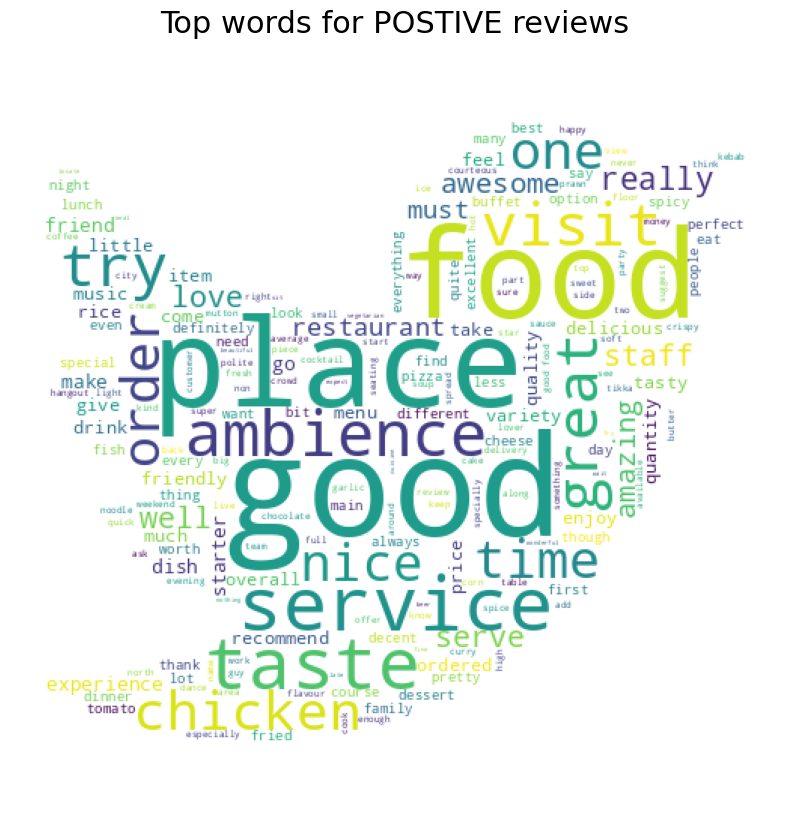

In [16]:
twitter_mask = np.array(Image.open('/content/drive/MyDrive/Colab Notebooks/COM6101/twitter_mask3.jpg'))

wc = WordCloud(
    background_color='white',
    max_words=200,
    mask=twitter_mask,
)

wc.generate(' '.join(str(text) for text in df.loc[df['Rating_encoded'] == 1, 'Review_clean']))
#wc.generate(' '.join(text for text in df.loc[df['Rating_encoded'] == 1, 'Review_clean']))
plt.figure(figsize=(18,10))
plt.title('Top words for POSTIVE reviews',
          fontdict={'size': 22,  'verticalalignment': 'bottom'})
plt.imshow(wc)
plt.axis("off")
plt.show()

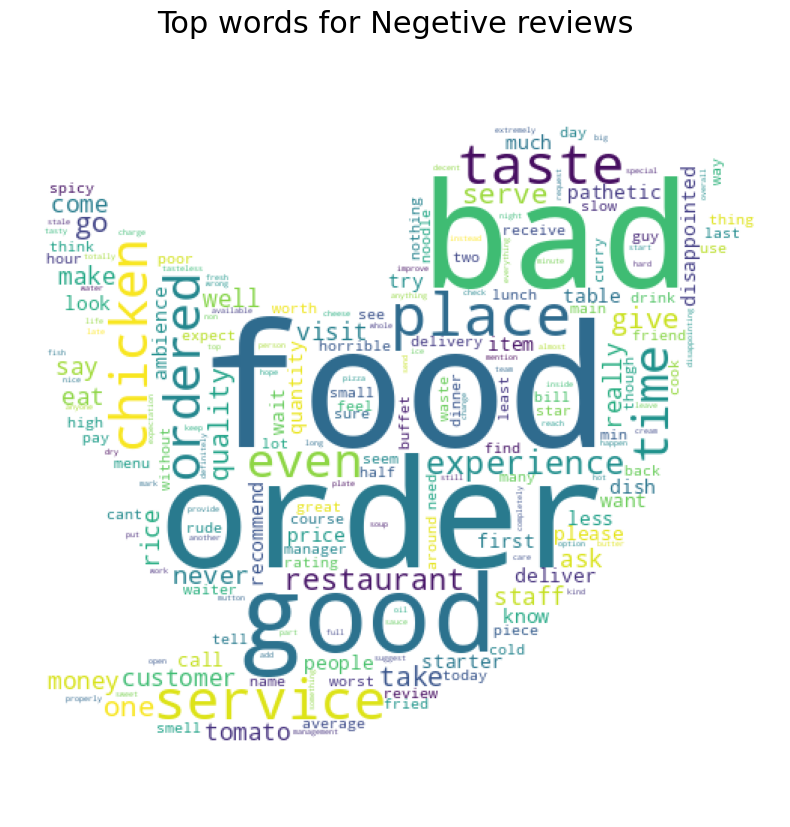

In [17]:
twitter_mask = np.array(Image.open('/content/drive/MyDrive/Colab Notebooks/COM6101/twitter_mask3.jpg'))

wc = WordCloud(
    background_color='white',
    max_words=200,
    mask=twitter_mask,
)
wc.generate(' '.join(str(text) for text in df.loc[df['Rating_encoded'] == 0, "Review_clean"]))
plt.figure(figsize=(18,10))
plt.title('Top words for Negetive reviews',
          fontdict={'size': 22,  'verticalalignment': 'bottom'})
plt.imshow(wc)
plt.axis("off")
plt.show()

##Vectorization

In [18]:
# how to define X and y (from the SMS data) for use with COUNTVECTORIZER
x = df['Review_clean']
y = df['Rating_encoded']

print(len(x), len(y))

9954 9954


In [19]:
# Split into train and test sets
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42)
print(len(x_train), len(y_train))
print(len(x_test), len(y_test))

7465 7465
2489 2489


In [21]:
from sklearn.feature_extraction.text import CountVectorizer

# instantiate the vectorizer
x_train.fillna('', inplace=True)
vect = CountVectorizer()
vect.fit(x_train)

CountVectorizer()

In [23]:
# Use the trained to create a document-term matrix from train and test sets
x_test.fillna('', inplace=True)
x_train_dtm = vect.transform(x_train)
x_test_dtm = vect.transform(x_test)

##Tunning CountVectorizer

In [24]:
vect_tunned = CountVectorizer(stop_words='english', ngram_range=(1,2),
                              min_df=0.1, max_df=0.7, max_features=100)

##TF-IDF

In [25]:
from sklearn.feature_extraction.text import TfidfTransformer

tfidf_transformer = TfidfTransformer()

tfidf_transformer.fit(x_train_dtm)
x_train_tfidf = tfidf_transformer.transform(x_train_dtm)

x_train_tfidf

<7465x6650 sparse matrix of type '<class 'numpy.float64'>'
	with 146126 stored elements in Compressed Sparse Row format>

##Word Embeddings: GloVe

In [26]:
texts = df['Review_clean']
target = df['Rating_encoded']

In [28]:
# Calculate the length of our vocabulary
texts.fillna('', inplace=True)
word_tokenizer = Tokenizer()
word_tokenizer.fit_on_texts(texts)

vocab_length = len(word_tokenizer.word_index) + 1
vocab_length

7380

Pad_sequences

In [29]:
sequence = [[1], [2, 3], [4, 5, 6]]
tf.keras.preprocessing.sequence.pad_sequences(sequence, padding='post')

array([[1, 0, 0],
       [2, 3, 0],
       [4, 5, 6]], dtype=int32)

In [30]:
tf.keras.preprocessing.sequence.pad_sequences(
    sequence, maxlen=None, dtype='int32', padding='pre',
    truncating='pre', value=0.0
)

array([[0, 0, 1],
       [0, 2, 3],
       [4, 5, 6]], dtype=int32)

In [31]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [32]:
def embed(corpus):
    return word_tokenizer.texts_to_sequences(corpus)

longest_train = max(texts, key=lambda sentence: len(word_tokenize(sentence)))
length_long_sentence = len(word_tokenize(longest_train))

train_padded_sentences = pad_sequences(
    embed(texts),
    length_long_sentence,
    padding='post'
)

train_padded_sentences

array([[1561,    3,  356, ...,    0,    0,    0],
       [ 171,    2,  440, ...,    0,    0,    0],
       [1257,   35,   12, ...,    0,    0,    0],
       ...,
       [1250,  238,   26, ...,    0,    0,    0],
       [1163,  192,  693, ...,    0,    0,    0],
       [  12,   50,  308, ...,    0,    0,    0]], dtype=int32)

##GloVe

In [33]:
embeddings_dictionary = dict()
embedding_dim = 100

# Load GloVe 100D embeddings
with open('/content/drive/MyDrive/Colab Notebooks/glove.6B.100d.txt') as fp:
    for line in fp.readlines():
        records = line.split()
        word = records[0]
        vector_dimensions = np.asarray(records[1:], dtype='float32')
        embeddings_dictionary [word] = vector_dimensions

# embeddings_dictionary

In [34]:
# Now we will load embedding vectors of those words that appear in the
# Glove dictionary. Others will be initialized to 0.

embedding_matrix = np.zeros((vocab_length, embedding_dim))

for word, index in word_tokenizer.word_index.items():
    embedding_vector = embeddings_dictionary.get(word)
    if embedding_vector is not None:
        embedding_matrix[index] = embedding_vector

embedding_matrix

array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [-0.030769  ,  0.11993   ,  0.53908998, ..., -0.52877998,
         0.17584001,  1.06500006],
       [-0.16486   ,  0.91996998,  0.22736999, ..., -0.067904  ,
         1.5072    ,  0.60889   ],
       ...,
       [-0.31147   ,  0.84126002, -0.73078001, ..., -0.22547001,
         0.61804998,  0.1       ],
       [ 0.18892001, -0.41179001,  0.13657001, ...,  0.13456   ,
        -0.25046   , -0.22363   ],
       [-0.46597999,  0.66372001,  1.17540002, ..., -0.60641998,
        -0.60777003, -0.087452  ]])

#Modeling

In [35]:
import plotly.figure_factory as ff

x_axes = ['positive', 'negative']
y_axes =  ['negative', 'positive']

def conf_matrix(z, x=x_axes, y=y_axes):

    z = np.flip(z, 0)

    # change each element of z to type string for annotations
    z_text = [[str(y) for y in x] for x in z]

    # set up figure
    fig = ff.create_annotated_heatmap(z, x=x, y=y, annotation_text=z_text, colorscale='Viridis')

    # add title
    fig.update_layout(title_text='<b>Confusion matrix</b>',
                      xaxis = dict(title='Predicted value'),
                      yaxis = dict(title='Real value')
                     )

    # add colorbar
    fig['data'][0]['showscale'] = True

    return fig

In [36]:
# Create a Multinomial Naive Bayes model
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()

# Train the model
nb.fit(x_train_dtm, y_train)

MultinomialNB()

##Naive Bayes DTM

In [37]:
# Make class anf probability predictions
y_pred_class = nb.predict(x_test_dtm)
y_pred_prob = nb.predict_proba(x_test_dtm)[:, 1]

In [38]:
# calculate accuracy of class predictions
from sklearn import metrics
print(metrics.accuracy_score(y_test, y_pred_class))

conf_matrix(metrics.confusion_matrix(y_test, y_pred_class))

0.8959421454399357


In [39]:
# Calculate AUC
metrics.roc_auc_score(y_test, y_pred_prob)

0.9392243118269559

##Naive Bayes

In [40]:
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.pipeline import Pipeline

pipe = Pipeline([('bow', CountVectorizer()),
                 ('tfid', TfidfTransformer()),
                 ('model', MultinomialNB())])

In [41]:
# Fit the pipeline with the data
pipe.fit(x_train, y_train)

y_pred_class = pipe.predict(x_test)

print(metrics.accuracy_score(y_test, y_pred_class))

conf_matrix(metrics.confusion_matrix(y_test, y_pred_class))

0.834069907593411


##XGBoost

In [42]:
import xgboost as xgb

pipe = Pipeline([
    ('bow', CountVectorizer()),
    ('tfid', TfidfTransformer()),
    ('model', xgb.XGBClassifier(
        learning_rate=0.1,
        max_depth=7,
        n_estimators=80,
        use_label_encoder=False,
        eval_metric='auc',
        # colsample_bytree=0.8,
        # subsample=0.7,
        # min_child_weight=5,
    ))
])

In [43]:
# Fit the pipeline with the data
pipe.fit(x_train, y_train)

y_pred_class = pipe.predict(x_test)
y_pred_train = pipe.predict(x_train)

print('Train: {}'.format(metrics.accuracy_score(y_train, y_pred_train)))
print('Test: {}'.format(metrics.accuracy_score(y_test, y_pred_class)))

conf_matrix(metrics.confusion_matrix(y_test, y_pred_class))

Train: 0.9212324179504353
Test: 0.8822820409803134


##LSTM

In [44]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    train_padded_sentences,
    target,
    test_size=0.25
)

In [45]:

def glove_lstm():
    model = Sequential()

    model.add(Embedding(
        input_dim=embedding_matrix.shape[0],
        output_dim=embedding_matrix.shape[1],
        weights = [embedding_matrix],
        input_length=length_long_sentence
    ))

    model.add(Bidirectional(LSTM(
        length_long_sentence,
        return_sequences = True,
        recurrent_dropout=0.2
    )))

    model.add(GlobalMaxPool1D())
    model.add(BatchNormalization())
    model.add(Dropout(0.5))
    model.add(Dense(length_long_sentence, activation = "relu"))
    model.add(Dropout(0.5))
    model.add(Dense(length_long_sentence, activation = "relu"))
    model.add(Dropout(0.5))
    model.add(Dense(1, activation = 'sigmoid'))
    model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

    return model

model = glove_lstm()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 251, 100)          738000    
                                                                 
 bidirectional (Bidirection  (None, 251, 502)          706816    
 al)                                                             
                                                                 
 global_max_pooling1d (Glob  (None, 502)               0         
 alMaxPooling1D)                                                 
                                                                 
 batch_normalization (Batch  (None, 502)               2008      
 Normalization)                                                  
                                                                 
 dropout (Dropout)           (None, 502)               0         
                                                        

In [ ]:
# Load the model and train
# use GPU for training
with tf.device('/device:GPU:0'):


    model = glove_lstm()

    checkpoint = ModelCheckpoint(
        'model.h5',
        monitor = 'val_loss',
        verbose = 1,
        save_best_only = True
    )
    reduce_lr = ReduceLROnPlateau(
        monitor = 'val_loss',
        factor = 0.2,
        verbose = 1,
        patience = 5,
        min_lr = 0.001
    )
    history = model.fit(
        X_train,
        y_train,
        epochs = 7,
        batch_size = 32,
        validation_data = (X_test, y_test),
        verbose = 1,
        callbacks = [reduce_lr, checkpoint]
    )

Epoch 1/7
232/232 [==============================] - ETA: 0s - loss: 0.4411 - accuracy: 0.8223
Epoch 1: val_loss improved from inf to 0.42794, saving model to model.h5
232/232 [==============================] - 305s 1s/step - loss: 0.4411 - accuracy: 0.8223 - val_loss: 0.4279 - val_accuracy: 0.7828 - lr: 0.0010
Epoch 2/7
232/232 [==============================] - ETA: 0s - loss: 0.3109 - accuracy: 0.8778
Epoch 2: val_loss did not improve from 0.42794
232/232 [==============================] - 303s 1s/step - loss: 0.3109 - accuracy: 0.8778 - val_loss: 0.9657 - val_accuracy: 0.7751 - lr: 0.0010
Epoch 3/7
232/232 [==============================] - ETA: 0s - loss: 0.2776 - accuracy: 0.8876
Epoch 3: val_loss did not improve from 0.42794
232/232 [==============================] - 579s 3s/step - loss: 0.2776 - accuracy: 0.8876 - val_loss: 0.6134 - val_accuracy: 0.8439 - lr: 0.0010
Epoch 4/7
232/232 [==============================] - ETA: 0s - loss: 0.2555 - accuracy: 0.8982
Epoch 4: val_loss 

In [ ]:
# save as pkl file
joblib.dump(resampled_history,'model.h5')

In [51]:
# load the model
model = keras.models.load_model('/content/drive/MyDrive/Colab Notebooks/model.h5')

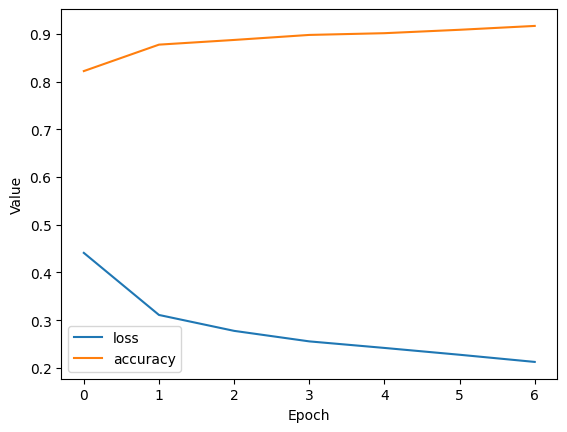

In [ ]:
def plot_learning_curves(history, metrics):
    for metric in metrics:
        plt.plot(history.history[metric], label=metric)
    plt.xlabel('Epoch')
    plt.ylabel('Value')
    plt.legend()
    plt.show()

plot_learning_curves(history, ['loss', 'accuracy'])

In [ ]:
y_preds = (model.predict(X_test) > 0.5).astype("int32")
conf_matrix(metrics.confusion_matrix(y_test, y_preds))

78/78 [==============================] - 10s 122ms/step


#Results

In [ ]:
# Get the weight of the model layer
weights = model.get_weights()

#Print the weight information of each layer
for i in range(len(weights)):
    print("Layer", i+1, "weights shape:", weights[i].shape)

index_word_reverse = {index: word for word, index in word_tokenizer.word_index.items()}

import numpy as np

# Calculate the importance of each word
feature_importance = np.sum(np.abs(embedding_matrix), axis=1)

# Print the first few words with the greatest importance
num_top_features = 20
top_indices = np.argsort(feature_importance)[::-1][:num_top_features]
top_features = [index_word_reverse[i] for i in top_indices]

print("Top", num_top_features, "features:")
for i, feature in enumerate(top_features, 1):
    print(i, ":", feature)

Layer 1 weights shape: (7380, 100)
Layer 2 weights shape: (100, 1004)
Layer 3 weights shape: (251, 1004)
Layer 4 weights shape: (1004,)
Layer 5 weights shape: (100, 1004)
Layer 6 weights shape: (251, 1004)
Layer 7 weights shape: (1004,)
Layer 8 weights shape: (502,)
Layer 9 weights shape: (502,)
Layer 10 weights shape: (502,)
Layer 11 weights shape: (502,)
Layer 12 weights shape: (502, 251)
Layer 13 weights shape: (251,)
Layer 14 weights shape: (251, 251)
Layer 15 weights shape: (251,)
Layer 16 weights shape: (251, 1)
Layer 17 weights shape: (1,)
Top 20 features:
1 : herein
2 : expander
3 : okrug
4 : dah
5 : saucepan
6 : foodstuff
7 : yen
8 : tablespoon
9 : sodium
10 : species
11 : telegram
12 : kinase
13 : county
14 : river
15 : vowel
16 : million
17 : cup
18 : gallon
19 : protein
20 : province


In [ ]:
print("Top", num_top_features, "features:")
for i, feature in enumerate(top_features, 1):
    print(i, ":", feature)

Top 20 features:
1 : herein
2 : expander
3 : okrug
4 : dah
5 : saucepan
6 : foodstuff
7 : yen
8 : tablespoon
9 : sodium
10 : species
11 : telegram
12 : kinase
13 : county
14 : river
15 : vowel
16 : million
17 : cup
18 : gallon
19 : protein
20 : province
